In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import heapq
from pathlib import Path
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split

sns.set_palette("pastel", 9)
#husl

### Handling missing values 
* removing rows with more than 1 missing value

### Processing functions

In [71]:
def my_read_data(download=False):
    # fetch dataset 
    
    if download:
        adult = fetch_ucirepo(id=2) 
        
        # data (as pandas dataframes) 
        X = adult.data.features 
        Y = adult.data.targets 
        
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=55)
        df_train = pd.concat([X_train, Y_train], axis=1)
        df_test = pd.concat([X_test, Y_test], axis=1)

        df_train.to_csv(Path("adults_data","adults_raw_train_data.csv"), index=None)
        df_test.to_csv(Path("adults_data","adults_raw_test_data.csv"), index=None)

    else: 
        df_train = pd.read_csv(Path("adults_data","adults_raw_train_data.csv"))
        df_test = pd.read_csv(Path("adults_data","adults_raw_test_data.csv")) 

        X_train = df_train.iloc[:,:-1]
        Y_train = pd.DataFrame(df_train.iloc[:,-1])

        X_test = df_test.iloc[:,:-1]
        Y_test = pd.DataFrame(df_test.iloc[:,-1])

    Y_train['income'] = Y_train['income'].replace({"<=50K.":"<=50K",
                                     ">50K.":">50K"})       
    Y_test['income'] = Y_test['income'].replace({"<=50K.":"<=50K",
                                     ">50K.":">50K"})   
    df_train['income'] = df_train['income'].replace({"<=50K.":"<=50K",
                                     ">50K.":">50K"})   
    df_test['income'] = df_test['income'].replace({"<=50K.":"<=50K",
                                     ">50K.":">50K"})   
        
    # metadata 
    #print(adult.metadata) 
    
    # variable information 
    #print(adult.variables) 

    return df_train, X_train, Y_train, df_test, X_test, Y_test



def general_info(df):
    print("################### Shape #################### \n", df.shape, "\n")
    print("################### Info ####################")
    df.info()
    print("\n", "################### Unique values #################### \n", df.nunique(), "\n")
    print("################### Nulls #################### \n", df.isnull().sum(axis=0), "\n")
    print("################### Description #################### \n")
    return df.describe().T


# Delete leading space
#data = data.applymap(remove_leading_space)
def remove_leading_space(value):
    if isinstance(value, str) and value.startswith(' '):
        return value.lstrip()
    else:
        return value
    

def check_largest(df, column, n):
    x = heapq.nlargest(n, df[column].unique())
    print(x)

def check_smallest(df, column, n):
    x = heapq.nsmallest(n, df[column].unique())
    print(x)

In [72]:
def save(title):
    plt.savefig(f'report/images/{title}.pdf', format='pdf', bbox_inches='tight')

In [73]:
df, X, Y, df_test, X_test, Y_test = my_read_data()

# before cleaning

                workclass  occupation  native-country
Missing values        785         788             221
Valid values        38288       38285           38852


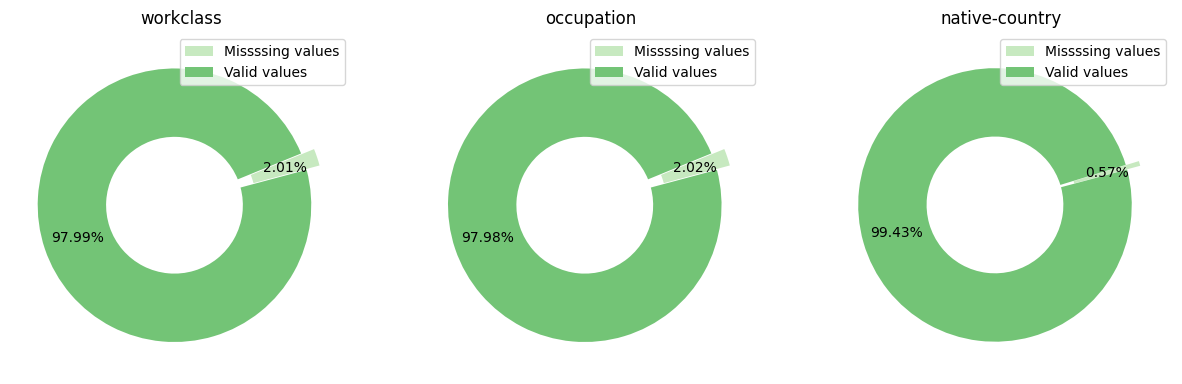

In [74]:
df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), 
                                  "Valid values": df.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))
print(df_missing_values)
axes = axes.flatten()
colors = sns.color_palette("Greens", len(df_missing_values.columns))

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75,
           colors=colors)
    ax.set_title(col)
    ax.legend(labels)

save("miss_raw")

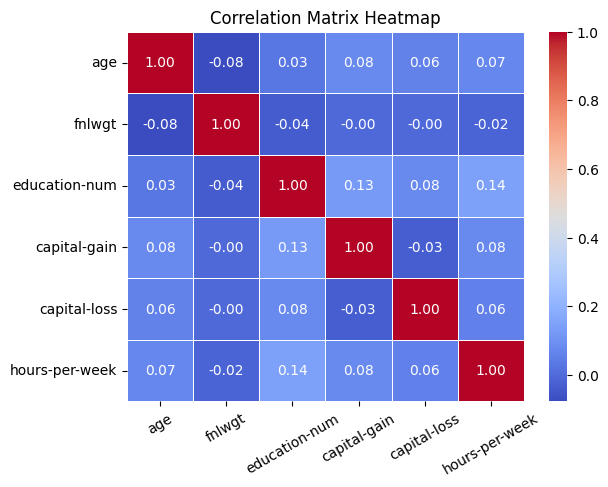

In [75]:
numeric_df = df.select_dtypes(include=['int','float'])

heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [76]:
general_info(df)

################### Shape #################### 
 (39073, 15) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       38288 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      38285 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  38852 non-null  object
 14  income          39073 non-null  object
dtypes: int64(6), object(9)
memory

,count,mean,std,min,25%,50%,75%,max
age,39073.0,38.610831,13.720682,17.0,28.0,37.0,48.0,90.0
fnlwgt,39073.0,189319.405881,105472.385572,12285.0,117312.0,178033.0,236977.0,1484705.0
education-num,39073.0,10.085251,2.563800,1.0,9.0,10.0,12.0,16.0
capital-gain,39073.0,1098.346505,7527.913927,0.0,0.0,0.0,0.0,99999.0
capital-loss,39073.0,87.660942,404.295673,0.0,0.0,0.0,0.0,4356.0
hours-per-week,39073.0,40.430630,12.407952,1.0,40.0,40.0,45.0,99.0


# after cleaning

In [77]:
region_mapping = {
    'United-States': "United-States",
    'Cuba' : "Middle America", 
    'Jamaica': "Middle America", 
    'India': "South Asia",
    'Mexico': "Mexico",
    'South': np.nan,    #### ??????
    'Puerto-Rico': "Middle America", 
    'Honduras': "Middle America", 
    'England': "West Europe", 
    'Canada': "Canada",
    'Germany': "Central Europe", 
    'Iran': "West Asia", 
    'Philippines': "Southeast Asia", 
    'Italy': "Central Europe", 
    'Poland': "East Europe",
    'Columbia': "South America", 
    'Cambodia': "Southeast Asia", 
    'Thailand': "Southeast Asia", 
    'Ecuador': "South America", 
    'Laos': "Southeast Asia",
    'Taiwan': "West Asia", 
    'Haiti': "Middle America", 
    'Portugal': "West Europe", 
    'Dominican-Republic': "Middle America",
    'El-Salvador': "Middle America", 
    'France': "West Europe", 
    'Guatemala': "Middle America", 
    'China': "East Asia", 
    'Japan': "East Asia",
    'Yugoslavia' : "East Europe", 
    'Peru': "South America", 
    'Outlying-US': "Outlying-US", 
    'Scotland': "West Europe",
    'Trinadad&Tobago': "South America", 
    'Greece': "South Europe", 
    'Nicaragua': "Middle America", 
    'Vietnam': "Southeast Asia", 
    'Hong': np.nan,           #### ??????
    'Ireland': "West Europe", 
    'Hungary': "East Europe", 
    'Holand-Netherlands': "Central Europe"
}

In [78]:
def null_count(row):
    return row.isnull().sum()

def nulls_table(data, threshold):
    
    temp_df = data.copy()
    temp_df['how-many-miss-vals'] = temp_df.apply(null_count, axis=1)
    temp_df_reduced = temp_df[temp_df['how-many-miss-vals'] <= threshold]
    nulls = temp_df_reduced['how-many-miss-vals'].value_counts()
    print(nulls)
    fig, axes = plt.subplots(1, 2, figsize=(12,6))

    ax1 = sns.countplot(data=temp_df, x="income", hue="income", stat="percent", ax=axes[0],
                        palette="Greens", legend=False)
    ax1.set_ylabel("Percentage")
    ax1.set_xlabel("Income")
    ax1.set_title("before removing rows")


    for p in ax1.patches:
        ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
        
        
    ax2 = sns.countplot(data=temp_df_reduced, x="income", hue='income',stat="percent", ax=axes[1],
                        palette="Greens", legend=False)
    ax2.set_ylabel("Percentage")
    ax2.set_xlabel("Income")
    ax2.set_title("after removing rows")


    for p in ax2.patches:
        ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    
    return temp_df_reduced

how-many-miss-vals
0    38080
1      208
Name: count, dtype: int64


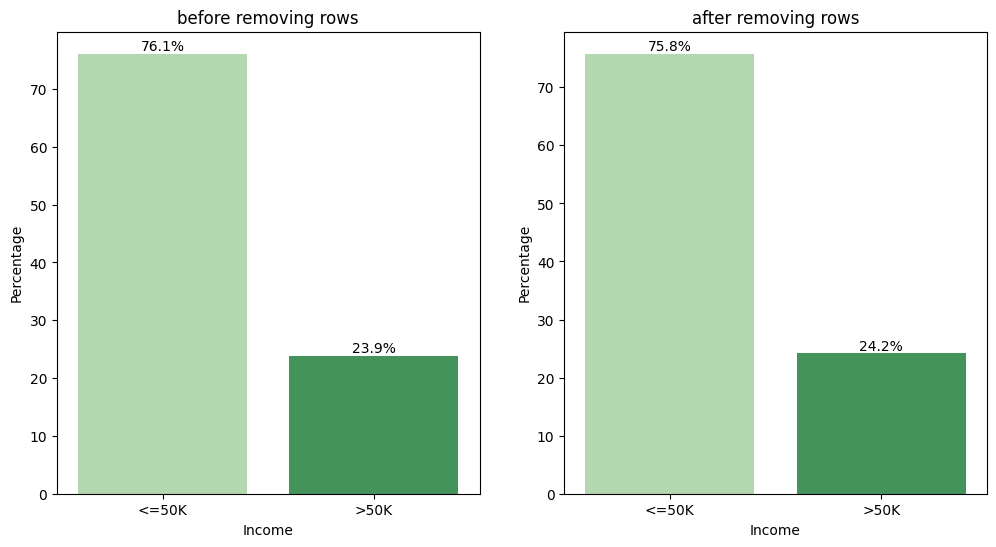

In [79]:
nulls_table(df,1)
save("row_removing_distr")

In [80]:
def cleaning_function(data_, reg_map):
    
    data = data_.copy()
    data.pop("education")

    # Delete leading space
    data = data.map(remove_leading_space)

    # Handle '?' missing values
    data = data.replace("?", np.nan)
    
    #unify income signs
    data['income'] = data['income'].replace({"<=50K.":"<=50K",
                                     ">50K.":">50K"})
    
    #capital transformation
    data["capital-gain"] = data["capital-gain"] - data["capital-loss"] 
    data = data.rename(columns = {"capital-gain":"capital"})
    data.pop("capital-loss")
    
    less_nulls = nulls_table(data,1)
    
    less_nulls["native-country"] = less_nulls["native-country"].map(reg_map, na_action="ignore")
    less_nulls = less_nulls.rename(columns={'native-country':'region'})
    
    bins= [0,18,25,31,41,51,61,71,150]
    labels_age = ['0-17','18-24','25-30','31-40','41-50','51-60','61-70','71+']
    less_nulls['age'] = pd.cut(less_nulls['age'], bins=bins, labels=labels_age, right=False)

    return less_nulls

how-many-miss-vals
0    36169
1      653
Name: count, dtype: int64
how-many-miss-vals
0    9053
1     168
Name: count, dtype: int64


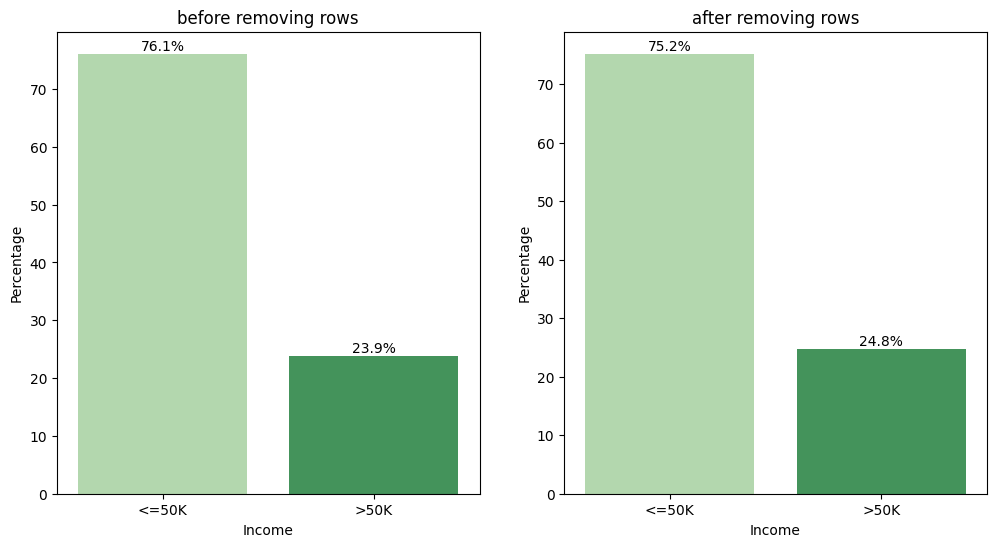

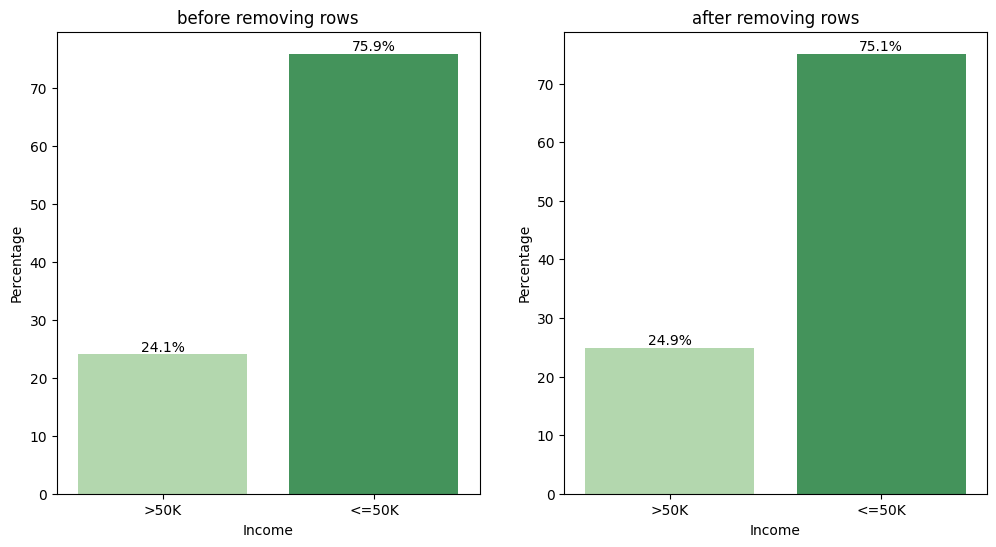

In [81]:
cleaned = cleaning_function(df, region_mapping)
save('imb_train')
cleaned_test = cleaning_function(df_test, region_mapping)

In [82]:
cleaned

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital,hours-per-week,region,income,how-many-miss-vals
0,18-24,Federal-gov,344394,10,Married-civ-spouse,Adm-clerical,Other-relative,White,Female,0,40,United-States,<=50K,0
1,61-70,Self-emp-inc,165667,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,40,United-States,<=50K,0
2,25-30,Private,276624,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,40,United-States,<=50K,0
3,31-40,Private,219546,13,Married-civ-spouse,Exec-managerial,Other-relative,White,Male,3411,47,United-States,<=50K,0
4,31-40,Private,103474,9,Married-civ-spouse,Sales,Wife,White,Female,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39068,31-40,Private,107160,8,Separated,Other-service,Not-in-family,White,Female,0,30,United-States,<=50K,0
39069,31-40,Private,184306,9,Divorced,Handlers-cleaners,Unmarried,White,Male,0,30,United-States,<=50K,0
39070,18-24,Private,149396,9,Never-married,Adm-clerical,Own-child,Black,Female,0,40,United-States,<=50K,0
39071,31-40,Private,398988,13,Never-married,Sales,Not-in-family,White,Male,0,40,United-States,<=50K,0


In [29]:
red = (1,0,0)

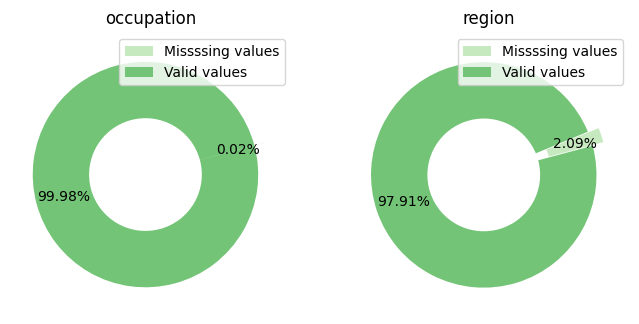

In [30]:
# plotting only these columns that have missing values

df_missing_values = pd.DataFrame({"Missing values": cleaned.isnull().sum(), 
                                  "Valid values": cleaned.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(8,10))
axes = axes.flatten()

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75,
           colors=colors)
    ax.set_title(col)
    ax.legend(labels)
save("clean_miss")

In [28]:
general_info(df)

################### Shape #################### 
 (39073, 15) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39073 non-null  int64 
 1   workclass       38288 non-null  object
 2   fnlwgt          39073 non-null  int64 
 3   education       39073 non-null  object
 4   education-num   39073 non-null  int64 
 5   marital-status  39073 non-null  object
 6   occupation      38285 non-null  object
 7   relationship    39073 non-null  object
 8   race            39073 non-null  object
 9   sex             39073 non-null  object
 10  capital-gain    39073 non-null  int64 
 11  capital-loss    39073 non-null  int64 
 12  hours-per-week  39073 non-null  int64 
 13  native-country  38852 non-null  object
 14  income          39073 non-null  object
dtypes: int64(6), object(9)
memory

,count,mean,std,min,25%,50%,75%,max
age,39073.0,38.610831,13.720682,17.0,28.0,37.0,48.0,90.0
fnlwgt,39073.0,189319.405881,105472.385572,12285.0,117312.0,178033.0,236977.0,1484705.0
education-num,39073.0,10.085251,2.563800,1.0,9.0,10.0,12.0,16.0
capital-gain,39073.0,1098.346505,7527.913927,0.0,0.0,0.0,0.0,99999.0
capital-loss,39073.0,87.660942,404.295673,0.0,0.0,0.0,0.0,4356.0
hours-per-week,39073.0,40.430630,12.407952,1.0,40.0,40.0,45.0,99.0


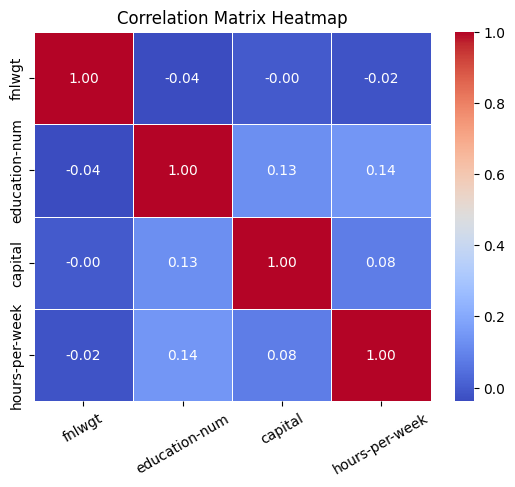

In [13]:
numeric_df = cleaned.select_dtypes(include=['int','float']).drop('how-many-miss-vals',axis=1)

heatmap = sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Conclusion**: there's no significant correlation

In [31]:
general_info(cleaned)

################### Shape #################### 
 (36822, 14) 

################### Info ####################
<class 'pandas.core.frame.DataFrame'>
Index: 36822 entries, 0 to 39072
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   age                 36822 non-null  category
 1   workclass           36822 non-null  object  
 2   fnlwgt              36822 non-null  int64   
 3   education-num       36822 non-null  int64   
 4   marital-status      36822 non-null  object  
 5   occupation          36813 non-null  object  
 6   relationship        36822 non-null  object  
 7   race                36822 non-null  object  
 8   sex                 36822 non-null  object  
 9   capital             36822 non-null  int64   
 10  hours-per-week      36822 non-null  int64   
 11  region              36052 non-null  object  
 12  income              36822 non-null  object  
 13  how-many-miss-vals  36822 non-nu

,count,mean,std,min,25%,50%,75%,max
fnlwgt,36822.0,189506.673701,105333.746620,13492.0,117476.0,178316.0,237352.25,1484705.0
education-num,36822.0,10.135544,2.556648,1.0,9.0,10.0,13.00,16.0
capital,36822.0,1041.472136,7673.805087,-4356.0,0.0,0.0,0.00,99999.0
hours-per-week,36822.0,40.948808,12.028255,1.0,40.0,40.0,45.00,99.0
how-many-miss-vals,36822.0,0.017734,0.131985,0.0,0.0,0.0,0.00,1.0


In [34]:
cleaned.pop('how-many-miss-vals')
cleaned_test.pop('how-many-miss-vals')
cleaned.pop('fnlwgt')
cleaned_test.pop('fnlwgt')
cleaned.to_csv(Path("adults_data","adults_cleaned_train_data.csv"), index=None)
cleaned_test.to_csv(Path("adults_data","adults_cleaned_test_data.csv"), index=None)

## Max values with 9s

In [20]:
check_largest(cleaned, "capital", 10)

[99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051, 15831, 15024]


In [ ]:
check_smallest(df, "capital", 10)

[-4356, -3900, -3770, -3683, -3175, -3004, -2824, -2754, -2603, -2559]


In [ ]:
cleaned[cleaned['capital'] == 99999].shape

(194, 14)

In [21]:
check_largest(cleaned, "hours-per-week", 40)
# godziny zawod

[99, 98, 97, 96, 95, 92, 91, 90, 89, 88, 87, 86, 85, 84, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56]


In [22]:
check_smallest(cleaned, "hours-per-week", 20)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


# after initial cleaning

## uni

                workclass  occupation  native-country
Missing values       2251        2260             680
Valid values        36822       36813           38393


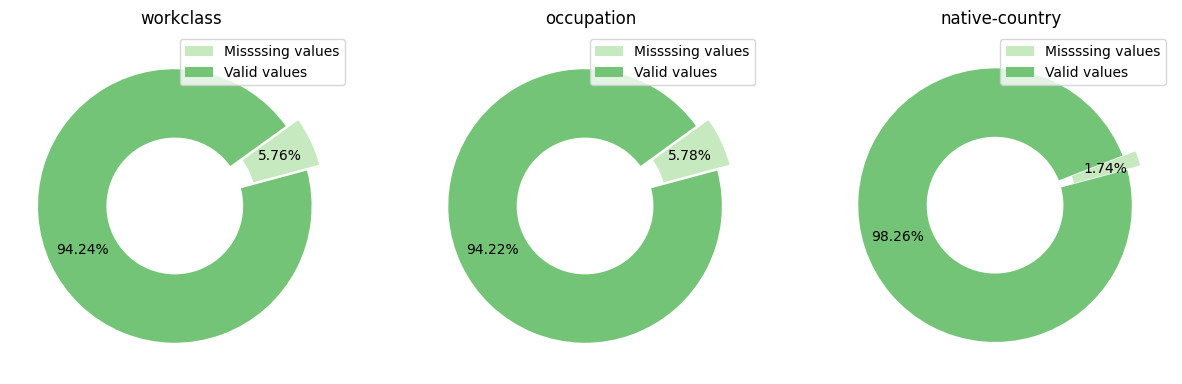

In [43]:
df = pd.read_csv(Path("adults_data","adults_raw_uni_train_data.csv")) 

df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), 
                                  "Valid values": df.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))
print(df_missing_values)
axes = axes.flatten()
colors = sns.color_palette("Greens", len(df_missing_values.columns))

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75,
           colors=colors)
    ax.set_title(col)
    ax.legend(labels)

save("miss_raw")

                workclass  occupation  region
Missing values       2251        2260     823
Valid values        36822       36813   38250


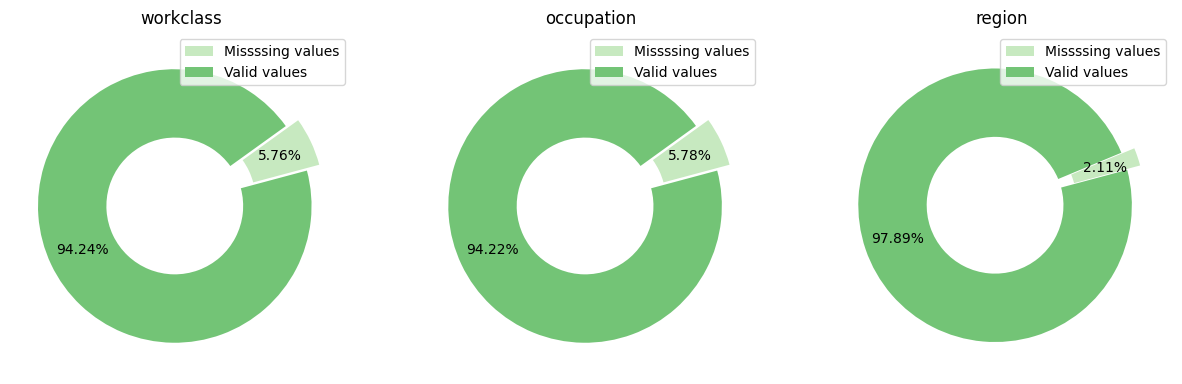

In [44]:
df = pd.read_csv(Path("adults_data","adults_raw_reg_train_data.csv")) 

df_missing_values = pd.DataFrame({"Missing values": df.isnull().sum(), 
                                  "Valid values": df.notnull().sum()})
#df_missing_values = df_missing_values[df_missing_values["Missing values"] > 0]
df_missing_values = df_missing_values[df_missing_values['Missing values'] > 0]
df_missing_values = df_missing_values.T

fig, axes = plt.subplots(1, len(df_missing_values.columns), figsize=(15, 7))
print(df_missing_values)
axes = axes.flatten()
colors = sns.color_palette("Greens", len(df_missing_values.columns))

for i, col in enumerate(df_missing_values.columns):
    labels = ['Missssing values', 'Valid values']
    ax  = axes[i]
    ax.pie(df_missing_values[col], autopct='%1.2f%%', wedgeprops=dict(width=0.5), 
           startangle=15, explode=(0.05,0.05), shadow=False, pctdistance=0.75,
           colors=colors)
    ax.set_title(col)
    ax.legend(labels)

save("miss_reg")

In [34]:
reg = pd.read_csv(Path("adults_data","adults_raw_reg_train_data.csv")) 
uni = pd.read_csv(Path("adults_data","adults_raw_uni_train_data.csv")) 
raw = pd.read_csv(Path("adults_data","adults_raw_train_data.csv")) 
nan = pd.read_csv(Path("adults_data","adults_raw_nan_train_data.csv")) 

In [35]:
reg.shape, uni.shape, raw.shape, nan.shape

((39073, 13), (39073, 13), (39073, 15), (39073, 15))

In [40]:
reg.isnull().sum().sum(), nan.isnull().sum().sum()

(5334, 5191)

In [37]:
raw = raw.map(remove_leading_space)
    # Handle '?' missing values
data = raw.replace("?", np.nan)

In [38]:
data.isnull().sum().sum()

5191

In [29]:
null_indices = raw.index[raw.isnull().any(axis=1)].tolist()

In [33]:
raw.iloc[66,:]

age                          60
workclass                   NaN
fnlwgt                   102310
education            Assoc-acdm
education-num                12
marital-status         Divorced
occupation                  NaN
relationship      Not-in-family
race                      White
sex                      Female
capital-gain                  0
capital-loss                  0
hours-per-week               45
native-country           Canada
income                   <=50K.
Name: 66, dtype: object

In [48]:
import pandas as pd

def add_nan_indicator_column(df):
    # Sprawdź, czy wiersz zawiera NaN
    nan_indicator = df.isnull().any(axis=1).astype(int)
    
    # Dodaj kolumnę do DataFrame
    df['NaN_indicator'] = nan_indicator
    
    return df

# Przykładowe dane

# Dodaj kolumnę wskazującą na wartości NaN
nansy = add_nan_indicator_column(nan)

nansy['NaN_indicator'].mean()

0.07432242213293067

how-many-miss-vals
0    36043
1      779
Name: count, dtype: int64


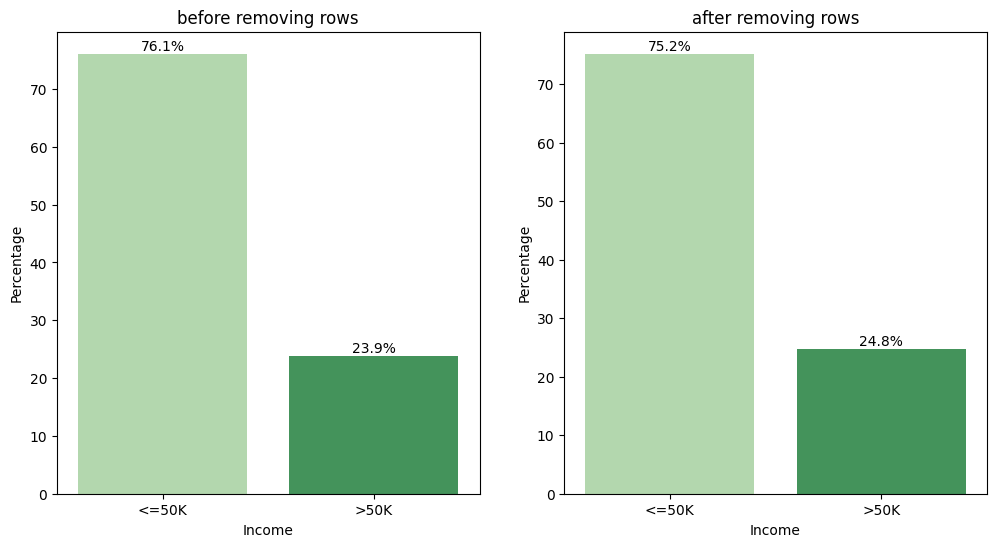

In [60]:
nulls_table(reg,1)
save('reg_distr')